In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

url = "2017_jun_final - 2017_jun_final.csv"
df = pd.read_csv(url)

# Перейменовуємо стовпці так
rename_mapping = {
    'Зарплата на місяць': 'Зарплата.в.місяць',
    'Мова програмування': 'Мова.програмування',
}

df = df.rename(columns={'Зарплата на місяць': 'Зарплата.в.місяць'})

# Head
print("--- Перші 5 рядків ---")
print(df.head())

In [ ]:
# Shape
print(f"Розмір таблиці: {df.shape}")

In [ ]:
# Types
print("--- Типи стовпців ---")
print(df.dtypes)

In [ ]:
# Частка пропусків
print("--- Частка пропусків ---")
print(df.isnull().sum() / len(df))

In [8]:
# Видаліть стовпці з пропусками, крім "Мова програмування"
cols_with_na = df.columns[df.isnull().any()].tolist()
if 'Мова програмування' in cols_with_na:
    cols_with_na.remove('Мова програмування')
df = df.drop(columns=cols_with_na)

In [ ]:
# Перевірка пропусків
print("--- Частка пропусків після чистки ---")
print(df.isnull().sum() / len(df))

In [ ]:
# Видаліть рядки (dropna)
df = df.dropna()

In [ ]:
# Новий розмір
print(f"Новий розмір таблиці: {df.shape}")

In [18]:
# Тільки Python
python_data = df[df['Мова програмування'] == 'Python']

In [ ]:
# Розмір python_data
print(f"Розмір python_data: {python_data.shape}")

In [ ]:
# Групування
grouped = python_data.groupby('Посада')

In [ ]:
# Агрегація (min, max)
aggregated_data = grouped.agg({'Зарплата.в.місяць': ['min', 'max']})

print("--- Агреговані дані ---")
print(aggregated_data.head())

In [ ]:
# Функція fill_avg_salary та apply
def fill_avg_salary(series):
    return series.mean()

# Застосовуємо функцію до стовпця 'Зарплата.в.місяць' у згрупованих даних
avg_salaries = grouped['Зарплата.в.місяць'].apply(fill_avg_salary)

# Додаємо результат в aggregated_data
aggregated_data['avg'] = avg_salaries

print("--- Результат з avg ---")
print(aggregated_data.head())

In [ ]:
# Describe
print("--- Статистика для avg ---")
print(aggregated_data['avg'].describe())


In [ ]:
# Збереження
aggregated_data.to_csv("python_salary_stats.csv")
print("Файл збережено.")

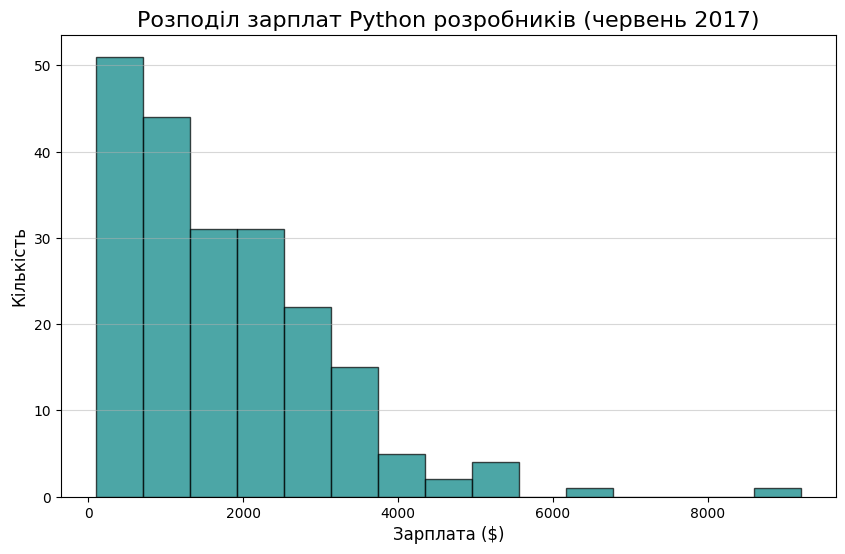

C:\Users\User\AppData\Local\Temp\ipykernel_15804\342499164.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, vert=False, patch_artist=True, labels=positions)


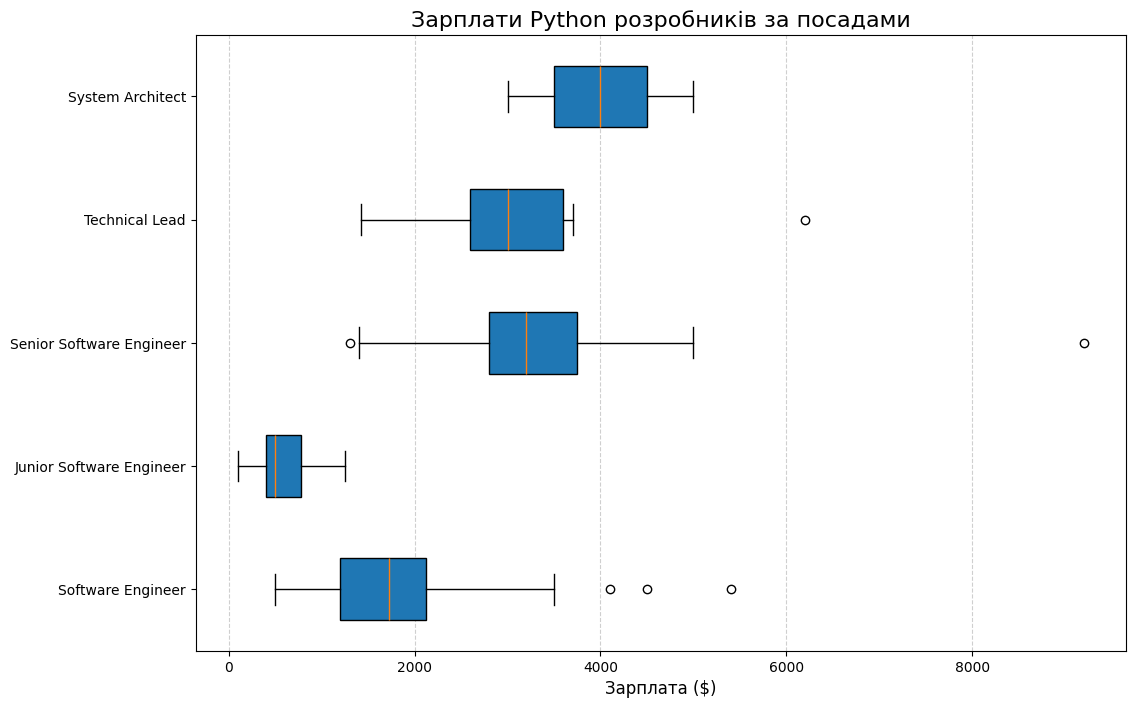

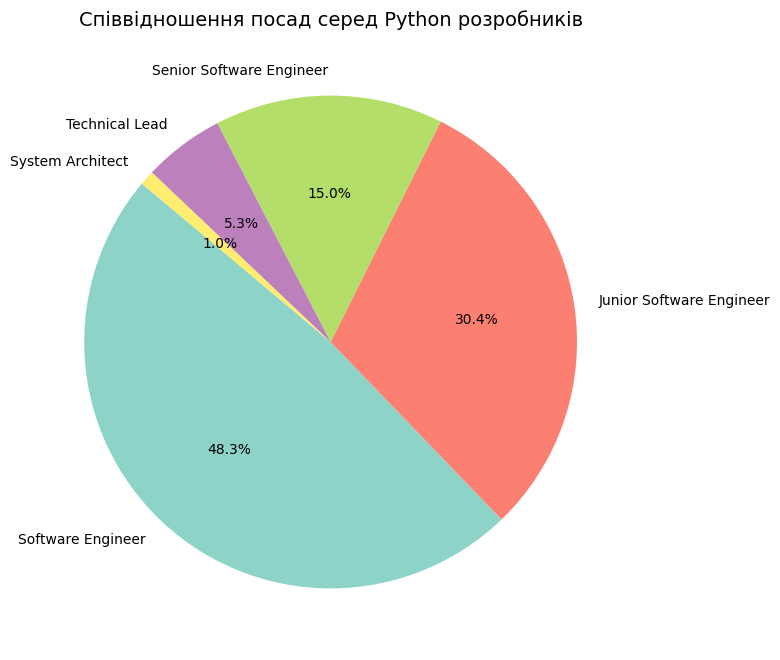

In [ ]:
# Графік 1: Розподіл зарплат Python-розробників
plt.figure(figsize=(10, 6))
plt.hist(python_data['Зарплата.в.місяць'], bins=15, color='teal', edgecolor='black', alpha=0.7)
plt.title('Розподіл зарплат Python розробників (червень 2017)', fontsize=16)
plt.xlabel('Зарплата ($)', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()


# Графік 2: Boxplot зарплат в залежності від посади
plt.figure(figsize=(12, 8))

positions = python_data['Посада'].unique()

data_to_plot = [python_data[python_data['Посада'] == pos]['Зарплата.в.місяць'] for pos in positions]

plt.boxplot(data_to_plot, vert=False, patch_artist=True, labels=positions)

plt.title('Зарплати Python розробників за посадами', fontsize=16)
plt.xlabel('Зарплата ($)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# Графік 3: Кругова діаграма
plt.figure(figsize=(8, 8))
position_counts = python_data['Посада'].value_counts()

colors = plt.get_cmap('Set3')(np.linspace(0, 1, len(position_counts)))

plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Співвідношення посад серед Python розробників', fontsize=14)
plt.show()